##### 1. Import Libraries and Datasets

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import openpyxl

In [2]:
from datasets import load_dataset
dataset = load_dataset("multi_news", download_mode="force_redownload")

Using custom data configuration default


Generating train split:   0%|          | 0/44972 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5622 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5622 [00:00<?, ? examples/s]

Dataset multi_news downloaded and prepared to C:\Users\Ervin\.cache\huggingface\datasets\multi_news\default\1.0.0\2f1f69a2bedc8ad1c5d8ae5148e4755ee7095f465c1c01ae8f85454342065a72. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
df = pd.DataFrame(dataset["train"])
print("SGH Media Reports dataset dimensions are:", df.shape)
df.head(3)

SGH Media Reports dataset dimensions are: (44972, 2)


,document,summary
0,"National Archives \n \n Yes, it’s that time ag...",– The unemployment rate dropped to 8.2% last m...
1,LOS ANGELES (AP) — In her first interview sinc...,"– Shelly Sterling plans ""eventually"" to divorc..."
2,"GAITHERSBURG, Md. (AP) — A small, private jet ...",– A twin-engine Embraer jet that the FAA descr...


##### 2. Duplicates removal and NULL value checks

<AxesSubplot:>

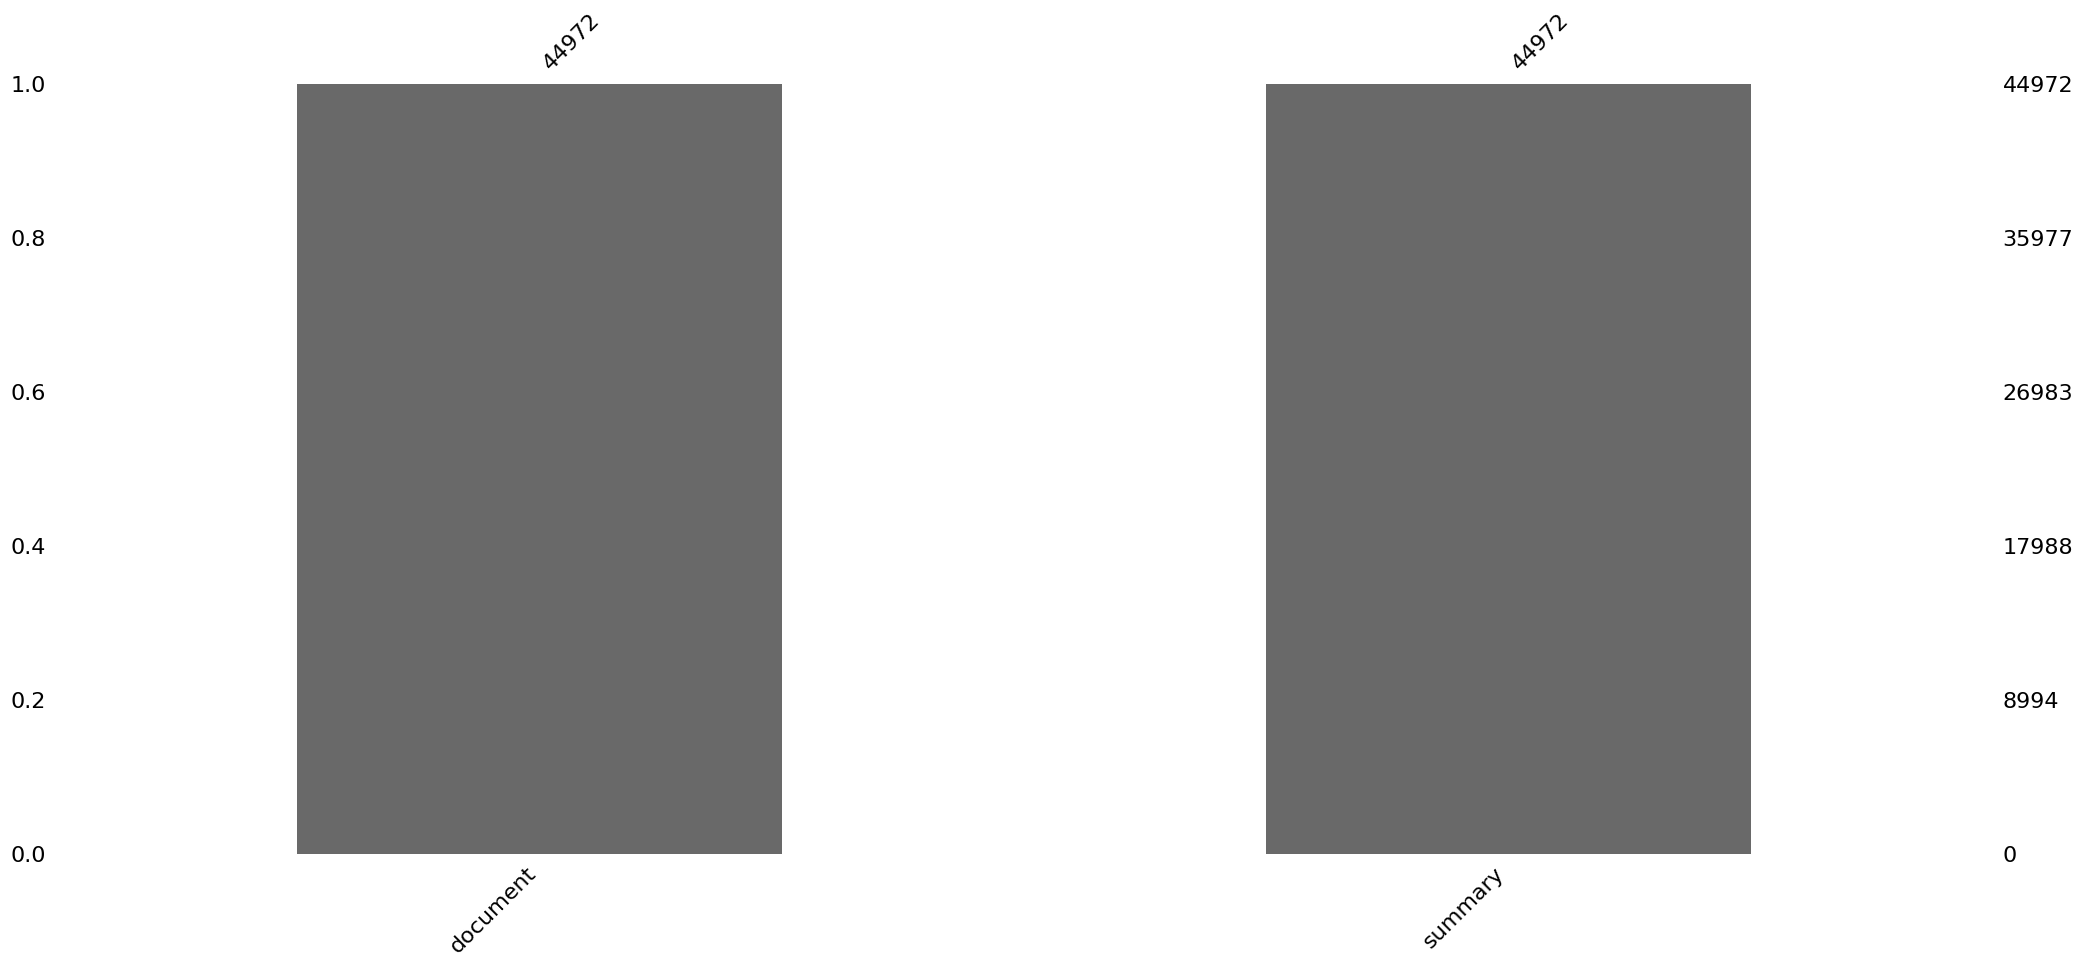

In [4]:
# Remove duplicates
df = df.drop_duplicates()

# Drop NAs
import missingno as msno
msno.bar(df)

In [5]:
# Visualise the character length of the article and summary bodies
df["article_length"] = df["document"].apply(lambda x: len(x))
df["summary_length"] = df["summary"].apply(lambda x: len(x))
df.head(3)

,document,summary,article_length,summary_length
0,"National Archives \n \n Yes, it’s that time ag...",– The unemployment rate dropped to 8.2% last m...,1708,443
1,LOS ANGELES (AP) — In her first interview sinc...,"– Shelly Sterling plans ""eventually"" to divorc...",5353,501
2,"GAITHERSBURG, Md. (AP) — A small, private jet ...",– A twin-engine Embraer jet that the FAA descr...,8010,934


##### 3. EDA

In [6]:
# Check data spread of media article lengths
import seaborn as sns

with pd.option_context('float_format', '{:f}'.format):
    print(df["article_length"].describe())

count     44972.000000
mean      11017.722072
std       19290.244659
min           0.000000
25%        4914.000000
50%        8145.000000
75%       13013.000000
max     2916289.000000
Name: article_length, dtype: float64


In [7]:
df[df["article_length"]==0] # EDA reveals that eight records with missing data still remain in the dataset

,document,summary,article_length,summary_length
453,,– An animal welfare officer in Oregon is getti...,0,640
16290,,– A marriage certificate shows hip-hop stars C...,0,738
16489,,– An online retailer has pulled a costume from...,0,1053
18812,,– A would-be thief in a Rio de Janeiro suburb ...,0,652
19279,,– The Philadelphia Flyers have introduced an o...,0,821
21620,,"– On last night's Daily Show, Jon Stewart took...",0,792
30735,,– Like a scorned ex-lover purging pics from a ...,0,451
41993,,– Nearly every star attending the Golden Globe...,0,988


count     44964.000000
mean      11019.682346
std       19291.400801
min         120.000000
25%        4914.750000
50%        8148.000000
75%       13014.250000
max     2916289.000000
Name: article_length, dtype: float64


<AxesSubplot:xlabel='article_length', ylabel='Count'>

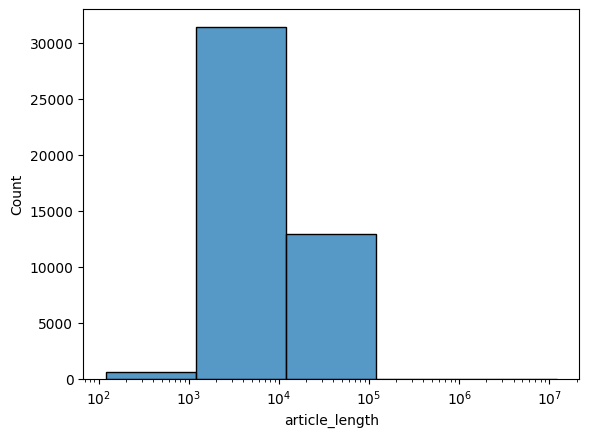

In [8]:
# Drop records with missing article bodies
df = df[df["article_length"]>0]

with pd.option_context('float_format', '{:f}'.format):
    print(df["article_length"].describe())
sns.histplot(data=df, x="article_length", binwidth=1, log_scale=True)

count    44964.000000
mean      1300.398541
std        405.876874
min        190.000000
25%       1010.000000
50%       1320.000000
75%       1566.000000
max       5910.000000
Name: summary_length, dtype: float64


<AxesSubplot:xlabel='summary_length', ylabel='Count'>

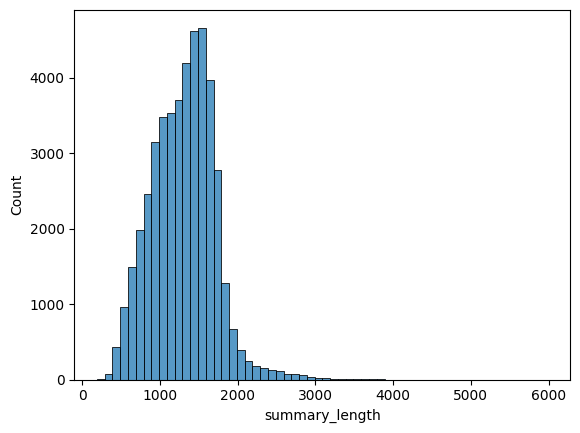

In [9]:
# Check data spread of media summary lengths
print(df["summary_length"].describe())
sns.histplot(data=df, x="summary_length", binwidth=100)

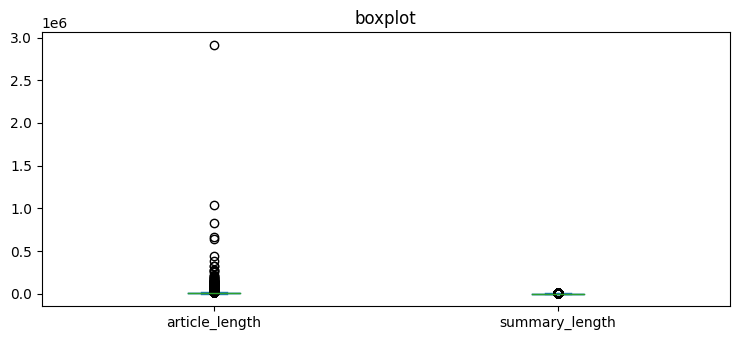

In [10]:
# Visualize boxplot of data distribution

import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = df[['article_length', 'summary_length']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

In [11]:
import numpy as np

# First quartile (Q1)
ArtLenQ1 = np.quantile(df['article_length'], 0.25)

# Median (Q2)

ArtLenQ2 = np.quantile(df['article_length'], 0.5)
  
# Third quartile (Q3)
ArtLenQ3 = np.quantile(df['article_length'], 0.75)

# Fourth quartile (Q3)
ArtLenQ4 = np.quantile(df['article_length'], 1.00)
  
# Interquaritle range (IQR)
ArtLenIQR = ArtLenQ3 - ArtLenQ1

ArtLen_lower_range = ArtLenQ1 - 1.5 * ArtLenIQR
ArtLen_upper_range = ArtLenQ3 + 1.5 * ArtLenIQR
ArtLen_outlier_free_list = [x for x in df['article_length'] if ((x > ArtLen_lower_range) & (x < ArtLen_upper_range))]
df = df.loc[df['article_length'].isin(ArtLen_outlier_free_list)]

print("Article Length Q1:", ArtLenQ1, "characters" )
print("Article Length Q2:", ArtLenQ2, "characters" )
print("Article Length Q3:", ArtLenQ3, "characters" )
print("Article Length Q4:", ArtLenQ4, "characters" )
print("Article Length Lower Range:", ArtLen_lower_range, "characters")
print("Article Length Upper Range:", ArtLen_upper_range, "characters")

# First quartile (Q1)
SumLenQ1 = np.quantile(df['summary_length'], 0.25)

# Median (Q2)

SumLenQ2 = np.quantile(df['summary_length'], 0.5)
  
# Third quartile (Q3)
SumLenQ3 = np.quantile(df['summary_length'], 0.75)

# Fourth quartile (Q3)
SumLenQ4 = np.quantile(df['summary_length'], 1.00)
  
# Interquaritle range (IQR)
SumLenIQR = SumLenQ3 - SumLenQ1

SumLen_lower_range = SumLenQ1 - 1.5 * SumLenIQR
SumLen_upper_range = SumLenQ3 + 1.5 * SumLenIQR
SumLen_outlier_free_list = [x for x in df['summary_length'] if ((x > SumLen_lower_range) & (x < SumLen_upper_range))]
df = df.loc[df['summary_length'].isin(SumLen_outlier_free_list)]

print("Summary Length Q1:", SumLenQ1, "characters" )
print("Summary Length Q2:", SumLenQ2, "characters" )
print("Summary Length Q3:", SumLenQ3, "characters" )
print("Summary Length Q4:", SumLenQ4, "characters" )
print("Summary Length Lower Range:", SumLen_lower_range, "characters")
print("Summary Length Upper Range:", SumLen_upper_range, "characters")

Article Length Q1: 4914.75 characters
Article Length Q2: 8148.0 characters
Article Length Q3: 13014.25 characters
Article Length Q4: 2916289.0 characters
Article Length Lower Range: -7234.5 characters
Article Length Upper Range: 25163.5 characters
Summary Length Q1: 993.0 characters
Summary Length Q2: 1296.0 characters
Summary Length Q3: 1543.0 characters
Summary Length Q4: 5910.0 characters
Summary Length Lower Range: 168.0 characters
Summary Length Upper Range: 2368.0 characters
